# Siconos software demo and tutorial

## Tutoral 1 : A 4 diodes bridge wave rectifier.

### Import siconos components
you may need to set PYTHONPATH or sys.path if siconos python packages are not in standard places.

In [2]:
import sys
# Update the following line depending on your siconos python installation.
sys.path.append("/usr/local/lib/python2.7/site-packages/")
sys.path.append("/Users/Franck/Library/Python/2.7/lib/python2.7/site-packages/")
import siconos.numerics as sn
import siconos.kernel as sk
import numpy as np

# NSDS definition 
--> Dynamical systems, constraints, nonsmooth laws ...

## The dynamical system

Consider the following example, a 4-diodes bridge wave rectifier

![title](figures/diodeBridge.png "DiodeBridge")

Using the Kirchhoff current and voltage laws and branch constitutive equations, the dynamics of the system writes

$$   \left[\begin{array}{c} 
   \dot v_L\\
   \dot i_L
   \end{array}\right]=
   \left[\begin{array}{cc} 
   0 & \frac{-1}{C}\\
   \frac{1}{L} & 0
   \end{array}\right].
   \left[\begin{array}{c} 
   v_L\\
   i_L
   \end{array}\right]
   +
   \left[\begin{array}{cccc} 
   0 & 0 & \frac{-1}{C} & \frac{1}{C}\\
   0 & 0 & 0 & 0
   \end{array}\right].
   \left[\begin{array}{c} 
   -v_{DR1}\\
   -v_{DF2}\\
   i_{DF1}\\
   i_{DR2}
   \end{array}\right]
$$

and if we denote

$$
   x = \left[\begin{array}{c} 
   \dot v_L\\
   \dot i_L
   \end{array}\right], \
   \lambda = \left[\begin{array}{c} 
   -v_{DR1}\\
   -v_{DF2}\\
   i_{DF1}\\
   i_{DR2}
   \end{array}\right], A=\left[\begin{array}{cc} 
   0 & \frac{-1}{C}\\
   \frac{1}{L} & 0
   \end{array}\right], r= \left[\begin{array}{cccc} 
   0 & 0 & \frac{-1}{C} & \frac{1}{C}\\
   0 & 0 & 0 & 0
   \end{array}\right].\lambda
$$

we get a first order linear system $$\dot x = A.x + r$$

Such systems are defined in Siconos with FirstOrderLinearDS, in a very simple way:

In [3]:
# dynamical system parameters
Lvalue = 1e-2    # inductance
Cvalue = 1e-6    # capacitance
Rvalue = 1e3     # resistance
Vinit = 10.0     # initial voltage
x0 = [Vinit, 0.] # initial state
# A matrix of the linear oscillator
A = np.zeros((2, 2), dtype=np.float64)
A.flat[...] = [0., -1.0/Cvalue, 1.0/Lvalue, 0.]

# build the dynamical system
ds = sk.FirstOrderLinearTIDS(x0, A)

To get more details on this (or any other) class of DS, try:

In [4]:
help(sk.FirstOrderLinearDS)

Help on class FirstOrderLinearDS in module siconos.kernel:

class FirstOrderLinearDS(FirstOrderNonLinearDS)
 |  Proxy of C++ FirstOrderLinearDS class.
 |  
 |  Method resolution order:
 |      FirstOrderLinearDS
 |      FirstOrderNonLinearDS
 |      DynamicalSystem
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  A(self)
 |      A(self) -> SP::SiconosMatrix
 |      
 |      Parameters
 |      ----------
 |      self: FirstOrderLinearDS const *
 |  
 |  __del__ lambda self
 |  
 |  __disown__(self)
 |  
 |  __getattr__ lambda self, name
 |  
 |  __init__(self, *args)
 |      __init__(self) -> FirstOrderLinearDS
 |      __init__(self, newX0, APlugin, bPlugin) -> FirstOrderLinearDS
 |      
 |      Parameters
 |      ----------
 |      newX0: SP::SiconosVector
 |      APlugin: std::string const &
 |      bPlugin: std::string const &
 |      
 |      __init__(self, newX0, newA) -> FirstOrderLinearDS
 |      
 |      Parameters
 |      ----------
 |      newX0: SP::Siconos

## Nonsmooth laws and constraints

Now, the nonsmooth part of the system must be defined, namely what are the nonsmooth laws and constraints between the variables. In Siconos, the definition of a nonsmooth law and a relation between one or two dynamical systems is called an Interaction (see Interactions between dynamical systems). Thus, the definition of a set of dynamical systems and of interactions between them will lead to the complete nonsmooth dynamical system.

For the oscillator of fig 1: Diode bridge, there exist some linear relations (constraints) between voltage and current 
inside the diode, given by

$$
   \left[ \begin{array}{c}
   i_{DR1}\\
   i_{DF2}\\
   -v_{DF1}\\
   -v_{DR2}
   \end{array} \right]
   = 
   \left[ \begin{array}{cc}
   0 & 0\\
   0 & 0\\
   -1 & 0\\
   1 & 0
   \end{array} \right]
   \cdot
   \left[ \begin{array}{c}
   v_L\\
   i_L
   \end{array} \right]
   +
   \left[ \begin{array}{cccc}
   \frac{1}{R} & \frac{1}{R} & -1 & 0\\
   \frac{1}{R} & \frac{1}{R} & 0 & -1\\
   1 & 0 & 0 & 0\\
   0 & 1 & 0 & 0
   \end{array} \right]
   \cdot
   \left[ \begin{array}{c}
   -v_{DR1}\\
   -v_{DF2}\\
   i_{DF1}\\
   i_{DR2}
   \end{array} \right] 
$$

with

$$
\begin{array}{ccccccccc}
   y&=&\left[ \begin{array}{c}i_{DR1}\\i_{DF2}\\-v_{DF1}\\-v_{DR2}\end{array} \right], 
   C &=& \left[ \begin{array}{cccc}\frac{1}{R} & \frac{1}{R} & -1 & 0\\ \frac{1}{R} & \frac{1}{R} & 0 & -1\\1 & 0 & 0 & 0\\0 & 1 & 0 & 0\end{array} \right], 
   D=\left[ \begin{array}{c}-v_{DR1}\\-v_{DF2}\\i_{DF1}\\i_{DR2}\end{array} \right]
\end{array}
$$

and recalling that

$$
   \lambda = \left[\begin{array}{c} 
   -v_{DR1}\\
   -v_{DF2}\\
   i_{DF1}\\
   i_{DR2}
   \end{array}\right],
   B = \left[\begin{array}{cccc} 
   0 & 0 & \frac{-1}{C} & \frac{1}{C}\\
   0 & 0 & 0 & 0
   \end{array}\right], \ r = B\lambda
$$

which is indeed a linear relation between $(x, r)$ and $(y, \lambda)$:

$y = Cx + D\lambda, \ \ \ r = B\lambda$

implemented in siconos as:

In [5]:
# B, C, D matrices of the relation
C = [[0.,   0.],
    [0,    0.],
    [-1.,  0.],
    [1.,   0.]]

D = [[1./Rvalue, 1./Rvalue, -1.,  0.],
    [1./Rvalue, 1./Rvalue,  0., -1.],
    [1.,        0.,         0.,  0.],
    [0.,        1.,         0.,  0.]]

B = [[0.,        0., -1./Cvalue, 1./Cvalue],
    [0.,        0.,  0.,        0.       ]]

# set relation type
relation= sk.FirstOrderLinearTIR(C, B)
relation.setDPtr(D)

Each diode of the bridge is supposed to be ideal, with the behavior shown on left-hand sketch of the figure below

![title](figures/diodeNonsmooth.png "IdealDiode")

Such a behavior can be described with a **complementarity condition** between current and reverse voltage.

Complementarity between two variables $y \in R^m, \lambda \in R^m$ writes

$$if \ 0 \leq y \ then \ \lambda = 0 \  and \ if \ \lambda \geq 0 \ then \ y = 0$$

or, using $\perp$ symbol,

$$0 \leq y\, \perp \, \lambda \geq 0$$
The inequalities must be considered component-wise.
   
Then, back to our circuit, the complementarity conditions, results of the ideal diodes characteristics are given by:

$$
   \begin{array}{l}
   0 \leq -v_{DR1} \, \perp \, i_{DR1} \geq 0\\
   0 \leq -v_{DF2} \, \perp \, i_{DF2} \geq 0\\
   0 \leq i_{DF1} \, \perp \, -v_{DF1} \geq 0\\
   0 \leq i_{DR2} \, \perp \, -v_{DR2} \geq 0\\
   \end{array} \ \ \ \ \ \ or \ \ \ \ \ \  0 \leq y \, \perp \, \lambda \geq 0
$$

Note that depending on the diode position in the bridge, $y_i$ stands for the reverse voltage across
the diode or for the diode current.

To represent such a nonsmooth law siconos has a class ComplementarityConditionNSL (you will find NSL in each class-name defining a nonsmooth law):

In [6]:
interaction_size = 4  # number of constraints
nonsmooth_law = sk.ComplementarityConditionNSL(interaction_size)

A nonsmooth law and a relation define something called **Interaction** in Siconos

In [7]:
interaction = sk.Interaction(nonsmooth_law, relation)

Notice that this interaction just describe some relations and laws but is not connected to any real dynamical system, for the moment.
  
The modeling part is almost complete, since only one dynamical system and one interaction are needed to describe the problem.
They must be gathered into a specific object, the **Model**.
A model contains a nonsmooth dynamical system and the description of its simulation. The building of this object is quite simple: just set the time window for the simulation, include dynamical systems and link them to the correct interactions.

In [8]:
# dynamical systems and interactions must be gathered into a model
t0 = 0. # initial time
T = 5.0e-3 # duration of the simulation
DiodeBridge = sk.Model(t0, T)
# add the dynamical system in the nonsmooth dynamical system of the model
DiodeBridge.nonSmoothDynamicalSystem().insertDynamicalSystem(ds)
# link the interaction and the dynamical system
DiodeBridge.nonSmoothDynamicalSystem().link(interaction, ds)

# Simulation process definition

It's time to describe how our nonsmooth dynamical system will be discretize, formulate and solve.
You need now to define how the nonsmooth dynamical system will be integrated over time. This is the role of the **Simulation**, which must set:

* how dynamical systems are discretized and integrate over a time step
* how the resulting nonsmooth problem(s) will be formalized and solved

Two different strategies are available : event-capturing (a.k.a time stepping) schemes and event-driven schemes. 

For the Diode Bridge example, an event-capturing strategy will be used, with an Euler-Moreau integrator and a LCP (Linear Complementarity Problem) formulation.

Let us start with the 'one-step integrator', i.e. the description of the discretisation and integration of the dynamics over a time step, between time $t_i$ and $t_{i+1}$. The integration of the equation over the time step is based on a $\theta$-method, leads to:

$$
\begin{array}{ccc}
    x_{i+1} &=& x^{free}_{i}  +  hW^{-1}r_{i+1} \\
       W &=& (M - h\theta A) \\
       x^{free}_i &=&  x_i + h W^{-1}(A x_i + b)
       \end{array}
$$

implemented as:

In [9]:
theta = 0.5
osi = sk.EulerMoreauOSI(theta)

Next, based on the simulation strategy and the time-integration, a one-step nonsmooth problem must be formalized.

Considering the following discretization of the previously defined relations and nonsmooth law
$$   
\begin{array}{ccc}
   y_{i+1} &=& C(t_{i+1})x_{i+1} + D(t_{i+1})\lambda_{i+1} \\	
   R_{i+1} &=& B(t_{i+1})\lambda_{i+1}\\
   0 \leq y_{i+1}\ &\perp&  \lambda_{i+1} \geq 0
   \end{array}
$$
we get

$$
\begin{array}{ccc}
   y_{i+1} &=& q + M\lambda_{i+1} \\
   0 \leq y_{i+1}\ &\perp&  \lambda_{i+1} \geq 0
   \end{array}
$$

with $q = Cx^{free}_{i+1},    M = hCW^{-1}B + D$

This is known as a Linear Complementarity Problem, written in siconos thanks **LCP** class.


As usual, check user documentation for a complete review of the nonsmooth problems formulations available in Siconos.

In [10]:
osnspb = sk.LCP()

Depending on the chosen formulation, different solvers are available. You can for example change the default (Lemke)
for a non-symmetric QP, as below.
A complete list of available solvers can be found in documentation (LCP solvers: http://siconos.gforge.inria.fr/users_guide/lcp_solvers.html#lcp-solvers).

In [11]:
osnspb = sk.LCP(sn.SICONOS_LCP_NSQP)

Then the last step consists in the simulation creation, with its time discretisation

In [12]:
# simulation and time discretisation
time_step =  1.0e-6
td = sk.TimeDiscretisation(t0, time_step)
simu = sk.TimeStepping(td, osi, osnspb)

The connection with the nonsmooth dynamical system is done through the **Model**

In [13]:
DiodeBridge.setSimulation(simu)
DiodeBridge.initialize()

The model is now complete and ready to run

# Leading the simulation process

For the present case, x,y and λ at each time step are needed for postprocessing. Here is an example on how to get and save them in a numpy array

In [14]:
N = int((T - t0) / simu.timeStep()) + 1
data_plot = np.zeros((N, 8))
y = interaction.y(0)
lamb = interaction.lambda_(0)
x = ds.x()
k = 0
data_plot[k, 1] = x[0] #  inductor voltage
data_plot[k, 2] = x[1] # inductor current
data_plot[k, 3] = y[0] # diode R1 current
data_plot[k, 4] = -lamb[0] # diode R1 voltage
data_plot[k, 5] = -lamb[1] # diode F2 voltage
data_plot[k, 6] = lamb[2] # diode F1 current
data_plot[k, 7] = y[0] + lamb[2] # resistor current
k += 1

while simu.hasNextEvent():
    simu.computeOneStep() # Solve the LCP
    data_plot[k, 0] = simu.nextTime()
    data_plot[k, 1] = x[0]
    data_plot[k, 2] = x[1]
    data_plot[k, 3] = y[0]
    data_plot[k, 4] = - lamb[0]
    data_plot[k, 5] = - lamb[1]
    data_plot[k, 6] = lamb[2]
    data_plot[k, 7] = y[0] + lamb[2]
    k += 1 
    simu.nextStep() # Save current vars and prepare next step


* *hasNextEvent()* is true as long as there are events to be considered, i.e. until T is reached
* *nextStep()* is mainly used to increment the time step, save current state and prepare initial values for next step.
* *computeOneStep()* performs computation over the current time step. In the Moreau's time stepping case, it will first integrate the dynamics to
  obtain the so-called free-state, that is without non-smooth effects, then it will formalize and solve a LCP before re-integrate the dynamics using the LCP results. 

The results can now be postprocessed, using matplotlib pyplot for example

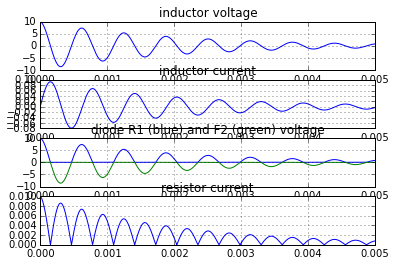

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.subplot(411)
plt.title('inductor voltage')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 1])
plt.grid()
plt.subplot(412)
plt.title('inductor current')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 2])
plt.grid()
plt.subplot(413)
plt.title('diode R1 (blue) and F2 (green) voltage')
plt.plot(data_plot[0:k - 1, 0], -data_plot[0:k - 1, 4])
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 5])
plt.grid()
plt.subplot(414)
plt.title('resistor current')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 7])
plt.grid()